#Cargar el dataset

In [1]:
import pandas as pd

# Cargar el dataset Zoo
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"
columnas = ["animal_name", "hair", "feathers", "eggs", "milk", "airborne",
            "aquatic", "predator", "toothed", "backbone", "breathes", "venomous",
            "fins", "legs", "tail", "domestic", "catsize", "class_type"]
df = pd.read_csv(url, names=columnas)

# Ver un resumen
df.head()


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


#Preprocesamiento (One Hot Encoding y Escalamiento)

In [2]:
from sklearn.preprocessing import StandardScaler

# Guardamos nombres de animales y eliminamos columna no numérica
animal_names = df["animal_name"]
df_numerico = df.drop(columns=["animal_name", "class_type"])  # Eliminamos también 'class_type' (etiquetas)

# Escalamiento
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerico)


#Clustering Jerárquico

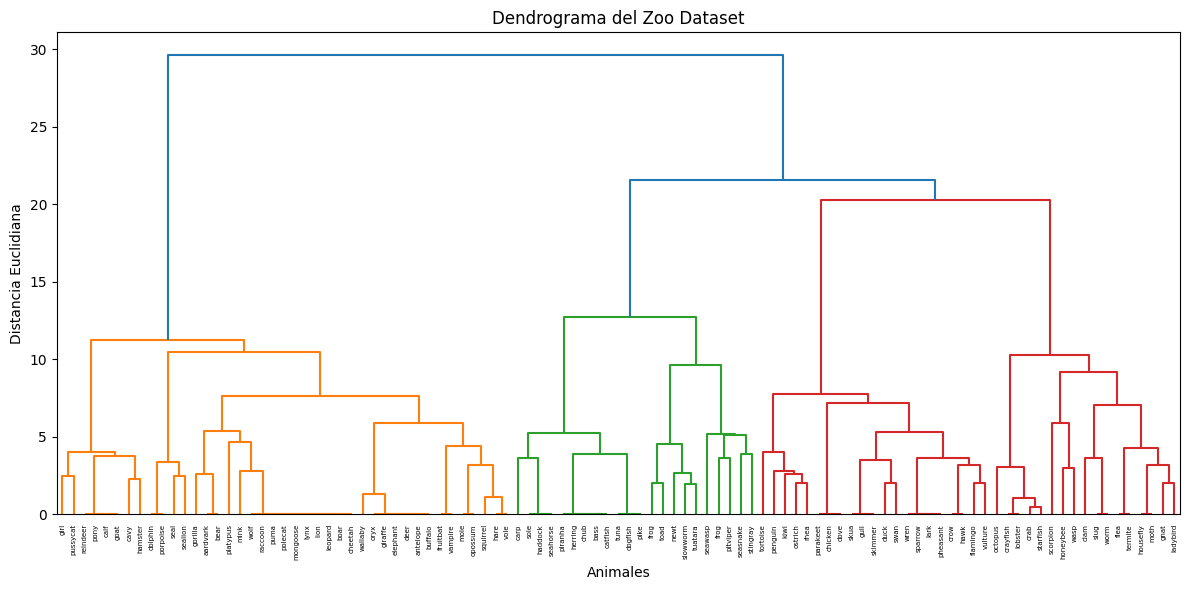

In [3]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Dendrograma
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'), labels=animal_names.values, leaf_rotation=90)
plt.title("Dendrograma del Zoo Dataset")
plt.xlabel("Animales")
plt.ylabel("Distancia Euclidiana")
plt.tight_layout()
plt.show()


#Heatmap de Clusters

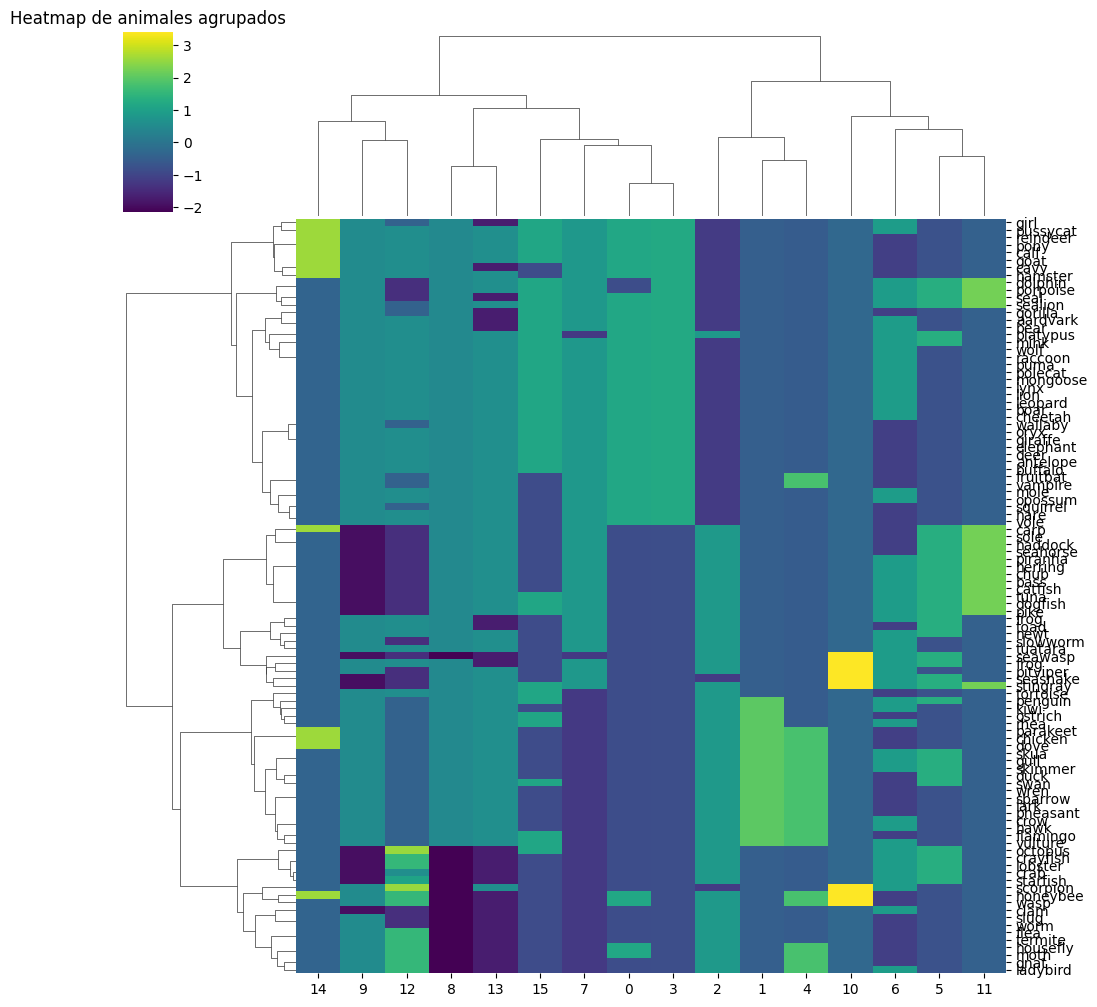

In [4]:
import seaborn as sns
from scipy.cluster.hierarchy import linkage

# Clustering
linkage_matrix = linkage(df_scaled, method='ward')

# Heatmap con clustermap
sns.clustermap(df_scaled, method='ward', cmap="viridis", figsize=(10, 10),
               yticklabels=animal_names.values)
plt.title("Heatmap de animales agrupados")
plt.show()


#Pregunta 1:
###¿Cuántos clusters se pueden identificar claramente en el dendrograma?

Aproximadamente entre 6 y 7 clusters se puede ver de en los cortes más pronunciados del dendrograma.

#Pregunta 2:
###¿Qué características parecen determinar la formación de los clusters?

Características como tener pelo, poner huevos, capacidad de volar o nadar, presencia de aletas, y número de patas parecen ser claves en la formación de los clusters.

#Pregunta 3:
###¿Los resultados del clustering tienen sentido biológico o zoológico?

Sí, los resultados reflejan agrupaciones biológicas como mamíferos, aves, peces, entre otros, este modelo agrupa animales similares en comportamiento o estructura corporal.

#Pregunta 4:
###¿Cómo afecta la normalización de los datos al clustering?

La normalización evita que características con mayor escala dominen el análisis para asi asegurar que todas las variables contribuyan de la misma forma al dataset



#Pregunta 5:
###¿Qué método de linkage utilizaste y por qué?

Usé método Ward, porque minimiza la varianza dentro de los clusters y tiende a formar grupos de tamaño similar, lo que es útil para datos balanceados.

#Pregunta 6:
###¿Qué otras técnicas de clustering podrías aplicar a este dataset y por qué?

Usaria K-Means y DBSCAN

K-Means: Es simple y rápido, útil si se conoce el número de clusters aproximado.

DBSCAN: Puede detectar ruido y clusters de forma no esférica.